In [32]:
# Fall23-INFO299-FinalProject

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm

import copy

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import shapiro
from sklearn.preprocessing import QuantileTransformer
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import DataLoader, TensorDataset

In [33]:
!wget sooryansatheesh.github.io/datarepo/UCBerkeley/INFO299Fall23-DeepLearningEnvironment/nationalforests.csv

URL transformed to HTTPS due to an HSTS policy
--2023-12-25 05:45:22--  https://sooryansatheesh.github.io/datarepo/UCBerkeley/INFO299Fall23-DeepLearningEnvironment/nationalforests.csv
Resolving sooryansatheesh.github.io (sooryansatheesh.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to sooryansatheesh.github.io (sooryansatheesh.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22632778 (22M) [text/csv]
Saving to: ‘nationalforests.csv.1’

nationalforests.csv 100%[===================>]  21.58M   122MB/s    in 0.2s    

2023-12-25 05:45:23 (122 MB/s) - ‘nationalforests.csv.1’ saved [22632778/22632778]



In [34]:
df = pd.read_csv("nationalforests.csv",delimiter=',')

df.head()

,Unnamed: 0,FID,latitude,longitude,brightness,acq_time,confidence,bright_t31,frp,daynight,type,year,Month,CALVEGZONE,FORESTNAME,date,county_name
0,0,0,32.6629,-116.5128,307.7,1858,35,290.0,13.3,D,0,2016,January,South Coast,Cleveland National Forest,2016-01-20,San Diego
1,1,1,32.6683,-116.6507,346.5,2045,92,314.5,56.2,D,0,2007,October,South Coast,Cleveland National Forest,2007-10-24,San Diego
2,2,2,32.6693,-116.6427,375.7,944,100,305.1,136.6,N,0,2007,October,South Coast,Cleveland National Forest,2007-10-24,San Diego
3,3,3,32.6699,-116.6648,424.9,1827,100,323.3,499.4,D,0,2007,October,South Coast,Cleveland National Forest,2007-10-23,San Diego
4,4,4,32.6706,-116.6373,348.6,2045,93,309.0,62.9,D,0,2007,October,South Coast,Cleveland National Forest,2007-10-24,San Diego


In [35]:
# df2 = pd.read_csv("raw.csv",delimiter=',')

# df2.head()

In [36]:
df.shape

(175260, 17)

In [37]:
df.columns

Index(['Unnamed: 0', 'FID', 'latitude', 'longitude', 'brightness', 'acq_time',
       'confidence', 'bright_t31', 'frp', 'daynight', 'type', 'year', 'Month',
       'CALVEGZONE', 'FORESTNAME', 'date', 'county_name'],
      dtype='object')

In [38]:
df.dtypes

Unnamed: 0       int64
FID              int64
latitude       float64
longitude      float64
brightness     float64
acq_time         int64
confidence       int64
bright_t31     float64
frp            float64
daynight        object
type             int64
year             int64
Month           object
CALVEGZONE      object
FORESTNAME      object
date            object
county_name     object
dtype: object

In [39]:
df.describe()

,Unnamed: 0,FID,latitude,longitude,brightness,acq_time,confidence,bright_t31,frp,type,year
count,175260.000000,175260.000000,175260.000000,175260.000000,175260.000000,175260.000000,175260.000000,175260.000000,175260.000000,175260.0,175260.000000
mean,87629.500000,87629.500000,38.915718,-121.152410,336.397621,1402.095852,75.845161,297.095314,137.305043,0.0,2015.211104
std,50593.348426,50593.348426,2.398946,1.915815,31.774483,651.927140,25.696507,11.754780,376.624124,0.0,5.987775
min,0.000000,0.000000,32.662900,-124.056800,300.000000,458.000000,0.000000,265.000000,0.000000,0.0,2000.000000
25%,43814.750000,43814.750000,37.184800,-123.038200,315.100000,633.000000,59.000000,290.100000,18.975000,0.0,2009.000000
50%,87629.500000,87629.500000,39.851700,-121.264050,327.800000,1825.000000,84.000000,295.500000,40.300000,0.0,2018.000000
75%,131444.250000,131444.250000,40.866500,-119.609800,347.100000,2050.000000,100.000000,302.400000,101.700000,0.0,2020.000000
max,175259.000000,175259.000000,42.005800,-116.379300,508.800000,2219.000000,100.000000,400.100000,11944.200000,0.0,2022.000000


In [40]:
df.nunique()

Unnamed: 0     175260
FID            175260
latitude        59289
longitude       55234
brightness       2033
acq_time          525
confidence        101
bright_t31        903
frp             11719
daynight            2
type                1
year               23
Month              12
CALVEGZONE          9
FORESTNAME         21
date             3950
county_name        39
dtype: int64

In [41]:
# Calculate the percentage of rows with NaN values in each column
percentage_nan = (df.isna().mean() * 100).round(2)

# Create a new DataFrame with column names as the index
percentage_nan_df = pd.DataFrame({'Percentage of NaN': percentage_nan})

# Print the DataFrame with column names as the index
print(percentage_nan_df)

             Percentage of NaN
Unnamed: 0                 0.0
FID                        0.0
latitude                   0.0
longitude                  0.0
brightness                 0.0
acq_time                   0.0
confidence                 0.0
bright_t31                 0.0
frp                        0.0
daynight                   0.0
type                       0.0
year                       0.0
Month                      0.0
CALVEGZONE                 0.0
FORESTNAME                 0.0
date                       0.0
county_name                0.0


In [42]:
#Feature Engineering Brightness df['brightness']

bin_edges = [300, 400, 500, float('inf')]
bin_labels = ['Category 1', 'Category 2', 'Category 3']

df['brightness_category'] = pd.cut(df['brightness'], bins=bin_edges, labels=bin_labels)

df['brightness_category'] = pd.Categorical(df['brightness_category'], categories=bin_labels, ordered=True)

In [43]:
df['brightness_category'].value_counts()

Category 1    166499
Category 2      8356
Category 3       313
Name: brightness_category, dtype: int64

In [44]:
min_cat_value=df['brightness_category'].value_counts().min()
balanced_df=pd.DataFrame()
for category in df['brightness_category'].dropna().unique():
  subset=df[df['brightness_category'] == category].sample(n=min_cat_value, random_state=42)
  balanced_df = pd.concat([balanced_df, subset], ignore_index=True)

df=balanced_df
df['brightness_category'].value_counts()

Category 1    313
Category 2    313
Category 3    313
Name: brightness_category, dtype: int64

In [45]:
#Feature Engineering the Date Value

df['date'] = pd.to_datetime(df['date'], errors ='coerce')
df['weekday']=df['date'].dt.dayofweek
df['week']=df['date'].dt.week
df['timestamp'] = (df['date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


# Drop the original date column
df = df.drop(['date'], axis=1)

<ipython-input-45-f5bd4b677788>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week']=df['date'].dt.week


In [46]:
# Convert latitude and longitude to Cartesian coordinates
df['x'] = np.cos(np.radians(df['latitude'])) * np.cos(np.radians(df['longitude']))
df['y'] = np.cos(np.radians(df['latitude'])) * np.sin(np.radians(df['longitude']))
df['z'] = np.sin(np.radians(df['latitude']))

# Drop the original latitude and longitude columns
df = df.drop(['latitude', 'longitude'], axis=1)

In [47]:
#Dropping certain columns

df=df.drop(['Unnamed: 0', 'FID','type','bright_t31','brightness'], axis=1)

In [48]:
# Handling Categorical and continuous Features

categorical_features=['daynight','county_name','weekday','CALVEGZONE','FORESTNAME','Month']
continuous_features=['x','y','z','acq_time','confidence','frp','week','year','timestamp']
cols_used=categorical_features+continuous_features

In [49]:
# Using Chisquare test to find the relation between the target variable and the categorical variables
target_variable='brightness_category'
significance_threshold = 0.05

for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df[target_variable])
    chi2, p, _, _ = chi2_contingency(contingency_table)

    if p > significance_threshold:
        print(f"Variable '{feature}' is not statistically significant (p-value: {p:.4f}). Consider removing it.")

In [50]:
# Using Random Forest Classifier to determine the feature importance
target_variable='brightness_category'
y = df[target_variable]
df_rfc=pd.DataFrame()
for feature in categorical_features:
  label_encoder = LabelEncoder()
  df_rfc[feature]= label_encoder.fit_transform(df[feature])


X_train, X_test, y_train, y_test = train_test_split(df_rfc, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

feature_importance = pd.Series(model.feature_importances_, index=df_rfc.columns)
print("Feature Importance:") # Low value features could be considered for removal
print(feature_importance.sort_values(ascending=False))

Feature Importance:
weekday        0.297986
county_name    0.194885
Month          0.158710
FORESTNAME     0.149965
CALVEGZONE     0.109575
daynight       0.088879
dtype: float64


In [51]:
conti_fields = ['x', 'y', 'z', 'acq_time', 'confidence', 'frp', 'week', 'year','timestamp']

# Using the shapiro wilk test for normality

for field in continuous_features:
    stat, p_value = shapiro(df[field])
    print(f'Shapiro-Wilk test for {field}: p-value = {p_value}')

# The results suggest that the data is not normal


Shapiro-Wilk test for x: p-value = 6.923487251408122e-18
Shapiro-Wilk test for y: p-value = 1.1143645380404263e-19
Shapiro-Wilk test for z: p-value = 1.9863154717448676e-24
Shapiro-Wilk test for acq_time: p-value = 1.0381956878071277e-37
Shapiro-Wilk test for confidence: p-value = 1.317220556465328e-43
Shapiro-Wilk test for frp: p-value = 1.2996935941813164e-34
Shapiro-Wilk test for week: p-value = 2.901903775302201e-17
Shapiro-Wilk test for year: p-value = 2.2061986543499783e-33
Shapiro-Wilk test for timestamp: p-value = 2.2666576348906302e-33


In [52]:
# We now use the Quantile transformer to bring  to the continuous variables
for column in continuous_features:
    df[column] = QuantileTransformer(output_distribution='normal').fit_transform(df[column].values.reshape(-1, 1))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (939). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (939). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (939). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (939). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (939). 

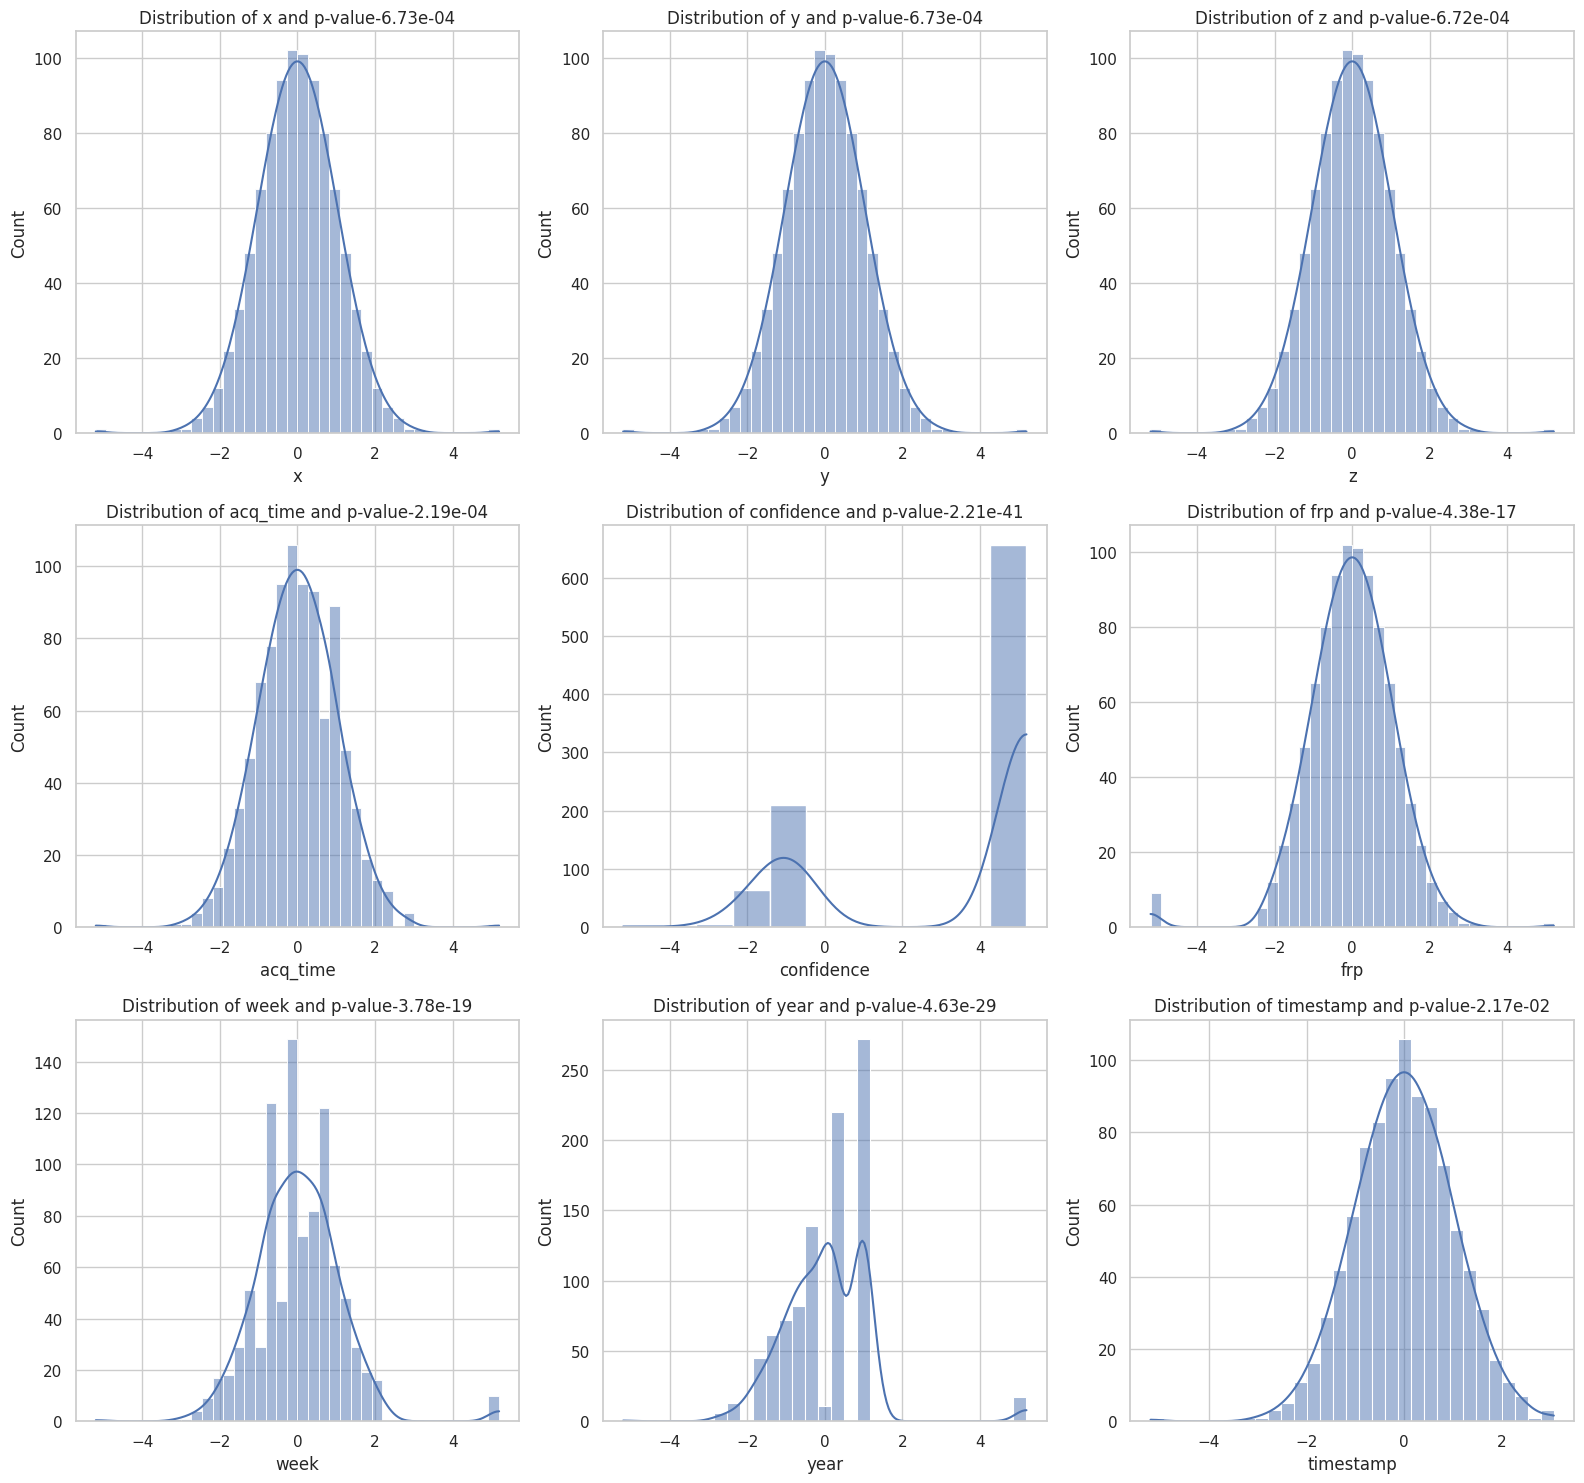

In [53]:
# Setting the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Calculating the number of rows and columns for subplots
num_cols = len(continuous_features)
num_rows = (num_cols - 1) // 3 + 1  # Adjusting the number of columns per row as needed

# Set the size of the figure
plt.figure(figsize=(16, 5 * num_rows))

# Looping through all columns and plot the distribution
for i, column in enumerate(continuous_features):
    plt.subplot(num_rows, 3, i + 1)
    sns.histplot(df[column], kde=True)
    stat, p_value = shapiro(df[column])
    plt.title(f'Distribution of {column} and p-value-{p_value:.2e}')

plt.tight_layout()  # Adjusting layout for better appearance
plt.show()

In [54]:
# Feature selection in  the continuous variables

X_continuous=df[continuous_features]

target_variable='brightness_category'
y_target = df[target_variable]

k_best = 5  # Choose the number of top features you want to select

selector = SelectKBest(f_classif, k=k_best)
X_new = selector.fit_transform(X_continuous, y_target)
selected_features = [continuous_features[i] for i in selector.get_support(indices=True)]
print("\nAll Continuous Features:", continuous_features)
print("Univariate Feature Selection Method-Selected Features:", selected_features)

model = RandomForestClassifier(random_state=42)
model.fit(X_continuous, y_target)

feature_importance = pd.Series(model.feature_importances_, index=continuous_features)
print("Feature Importance from Decision Tree-based Method:")
print(feature_importance.sort_values(ascending=False))


All Continuous Features: ['x', 'y', 'z', 'acq_time', 'confidence', 'frp', 'week', 'year', 'timestamp']
Univariate Feature Selection Method-Selected Features: ['y', 'acq_time', 'confidence', 'frp', 'timestamp']
Feature Importance from Decision Tree-based Method:
frp           0.526246
confidence    0.145097
acq_time      0.123552
z             0.047139
y             0.047045
x             0.040705
timestamp     0.037677
week          0.019776
year          0.012763
dtype: float64


In [55]:
#Finalized the features

revised_continuous_features=['acq_time', 'confidence','y', 'frp', 'timestamp']

revised_categorical_features=['county_name','weekday','Month']
categorical_features=revised_categorical_features
cols_used=revised_continuous_features+revised_categorical_features

In [56]:
X=df[cols_used]
y=df['brightness_category']

# Create a OneHotEncoder object
encoder = OneHotEncoder(drop='first', sparse=False)

# Apply one-hot encoding to the categorical columns using fit_transform
X_encoded_array = encoder.fit_transform(X[categorical_features])
X_encoded_df = pd.DataFrame(X_encoded_array, columns=encoder.get_feature_names_out(categorical_features), index=X.index)
X = pd.concat([X, X_encoded_df], axis=1)
X = X.drop(categorical_features, axis=1)

encoder_y = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_encoded_array = encoder_y.fit_transform(y.values.reshape(-1, 1))



# convert pandas DataFrame (X) and numpy array (y) into PyTorch tensors
X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y_encoded_array, dtype=torch.float32)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [57]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

input_size = X_train.shape[1]  # Assuming X_train is a DataFrame
output_size = y_train.shape[1]  # Since Y was one-hot encoded

In [58]:
class Multiclass(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(input_size,25)
        self.act = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)
        self.output = nn.Linear(25, output_size)

    def forward(self, x):
        x = self.act(self.hidden(x))
        x = self.dropout(x)
        x = self.output(x)
        return x

In [59]:
# initializing the loss metric and optimizer

model = Multiclass()
criterion = nn.CrossEntropyLoss()
# Defining the strength of L1/L2 regularization
l1_lambda = 0.001  # L1 regularization strength
l2_lambda = 0.001
optimizer = optim.Adam(model.parameters(), lr=0.001,weight_decay=l2_lambda)

In [60]:
# preparing the  model and training parameters
num_epochs = 300
batch_size = 100
batches_per_epoch = len(X_train) // batch_size

In [61]:
accuracy_highest = - np.inf  #intialized to negative infinity
weights_best = None
history_of_training_loss = []
history_accuracy_of_training = []
history_of_test_loss = []
history_accuracy_of_test = []

No. 0 Epoch: 100%|██████████| 7/7 [00:00<00:00, 63.33batch/s, accuracy=0.48, loss=1.15]


Epoch No. 0 validation: Cross Entropy loss=1.06, Accuracy=58.0%


No. 1 Epoch: 100%|██████████| 7/7 [00:00<00:00, 53.78batch/s, accuracy=0.58, loss=1.1]


Epoch No. 1 validation: Cross Entropy loss=1.03, Accuracy=61.2%


No. 2 Epoch: 100%|██████████| 7/7 [00:00<00:00, 53.77batch/s, accuracy=0.52, loss=1.1]


Epoch No. 2 validation: Cross Entropy loss=1.00, Accuracy=64.9%


No. 3 Epoch: 100%|██████████| 7/7 [00:00<00:00, 59.70batch/s, accuracy=0.55, loss=1.08]


Epoch No. 3 validation: Cross Entropy loss=0.97, Accuracy=66.5%


No. 4 Epoch: 100%|██████████| 7/7 [00:00<00:00, 90.68batch/s, accuracy=0.61, loss=1.07]


Epoch No. 4 validation: Cross Entropy loss=0.94, Accuracy=66.0%


No. 5 Epoch: 100%|██████████| 7/7 [00:00<00:00, 110.55batch/s, accuracy=0.62, loss=1.02]


Epoch No. 5 validation: Cross Entropy loss=0.91, Accuracy=67.6%


No. 6 Epoch: 100%|██████████| 7/7 [00:00<00:00, 107.72batch/s, accuracy=0.64, loss=0.987]


Epoch No. 6 validation: Cross Entropy loss=0.89, Accuracy=70.2%


No. 7 Epoch: 100%|██████████| 7/7 [00:00<00:00, 93.89batch/s, accuracy=0.64, loss=0.978]


Epoch No. 7 validation: Cross Entropy loss=0.86, Accuracy=71.3%


No. 8 Epoch: 100%|██████████| 7/7 [00:00<00:00, 104.81batch/s, accuracy=0.63, loss=0.969]


Epoch No. 8 validation: Cross Entropy loss=0.83, Accuracy=75.5%


No. 9 Epoch: 100%|██████████| 7/7 [00:00<00:00, 117.25batch/s, accuracy=0.64, loss=0.899]


Epoch No. 9 validation: Cross Entropy loss=0.81, Accuracy=75.0%


No. 10 Epoch: 100%|██████████| 7/7 [00:00<00:00, 87.43batch/s, accuracy=0.62, loss=0.926]


Epoch No. 10 validation: Cross Entropy loss=0.78, Accuracy=75.5%


No. 11 Epoch: 100%|██████████| 7/7 [00:00<00:00, 70.71batch/s, accuracy=0.68, loss=0.879]


Epoch No. 11 validation: Cross Entropy loss=0.76, Accuracy=75.5%


No. 12 Epoch: 100%|██████████| 7/7 [00:00<00:00, 87.95batch/s, accuracy=0.67, loss=0.874]


Epoch No. 12 validation: Cross Entropy loss=0.74, Accuracy=76.1%


No. 13 Epoch: 100%|██████████| 7/7 [00:00<00:00, 118.12batch/s, accuracy=0.73, loss=0.835]


Epoch No. 13 validation: Cross Entropy loss=0.73, Accuracy=76.6%


No. 14 Epoch: 100%|██████████| 7/7 [00:00<00:00, 16.27batch/s, accuracy=0.74, loss=0.809]


Epoch No. 14 validation: Cross Entropy loss=0.71, Accuracy=76.6%


No. 15 Epoch: 100%|██████████| 7/7 [00:00<00:00, 78.21batch/s, accuracy=0.69, loss=0.788]


Epoch No. 15 validation: Cross Entropy loss=0.70, Accuracy=77.1%


No. 16 Epoch: 100%|██████████| 7/7 [00:00<00:00, 99.98batch/s, accuracy=0.73, loss=0.76] 


Epoch No. 16 validation: Cross Entropy loss=0.68, Accuracy=76.6%


No. 17 Epoch: 100%|██████████| 7/7 [00:00<00:00, 106.79batch/s, accuracy=0.69, loss=0.766]


Epoch No. 17 validation: Cross Entropy loss=0.67, Accuracy=76.1%


No. 18 Epoch: 100%|██████████| 7/7 [00:00<00:00, 72.59batch/s, accuracy=0.66, loss=0.78]


Epoch No. 18 validation: Cross Entropy loss=0.66, Accuracy=76.6%


No. 19 Epoch: 100%|██████████| 7/7 [00:00<00:00, 94.22batch/s, accuracy=0.7, loss=0.787] 


Epoch No. 19 validation: Cross Entropy loss=0.65, Accuracy=77.7%


No. 20 Epoch: 100%|██████████| 7/7 [00:00<00:00, 88.50batch/s, accuracy=0.74, loss=0.72]


Epoch No. 20 validation: Cross Entropy loss=0.65, Accuracy=78.2%


No. 21 Epoch: 100%|██████████| 7/7 [00:00<00:00, 110.01batch/s, accuracy=0.76, loss=0.763]


Epoch No. 21 validation: Cross Entropy loss=0.64, Accuracy=79.3%


No. 22 Epoch: 100%|██████████| 7/7 [00:00<00:00, 106.79batch/s, accuracy=0.75, loss=0.705]


Epoch No. 22 validation: Cross Entropy loss=0.63, Accuracy=80.9%


No. 23 Epoch: 100%|██████████| 7/7 [00:00<00:00, 103.09batch/s, accuracy=0.74, loss=0.71]


Epoch No. 23 validation: Cross Entropy loss=0.63, Accuracy=81.4%


No. 24 Epoch: 100%|██████████| 7/7 [00:00<00:00, 97.03batch/s, accuracy=0.7, loss=0.699]


Epoch No. 24 validation: Cross Entropy loss=0.62, Accuracy=81.4%


No. 25 Epoch: 100%|██████████| 7/7 [00:00<00:00, 78.07batch/s, accuracy=0.77, loss=0.695]


Epoch No. 25 validation: Cross Entropy loss=0.61, Accuracy=81.4%


No. 26 Epoch: 100%|██████████| 7/7 [00:00<00:00, 66.70batch/s, accuracy=0.68, loss=0.704]


Epoch No. 26 validation: Cross Entropy loss=0.61, Accuracy=80.9%


No. 27 Epoch: 100%|██████████| 7/7 [00:00<00:00, 73.33batch/s, accuracy=0.76, loss=0.7]


Epoch No. 27 validation: Cross Entropy loss=0.60, Accuracy=80.9%


No. 28 Epoch: 100%|██████████| 7/7 [00:00<00:00, 73.50batch/s, accuracy=0.73, loss=0.696]


Epoch No. 28 validation: Cross Entropy loss=0.60, Accuracy=80.9%


No. 29 Epoch: 100%|██████████| 7/7 [00:00<00:00, 58.57batch/s, accuracy=0.69, loss=0.674]


Epoch No. 29 validation: Cross Entropy loss=0.60, Accuracy=80.9%


No. 30 Epoch: 100%|██████████| 7/7 [00:00<00:00, 87.60batch/s, accuracy=0.76, loss=0.638]


Epoch No. 30 validation: Cross Entropy loss=0.59, Accuracy=80.9%


No. 31 Epoch: 100%|██████████| 7/7 [00:00<00:00, 91.50batch/s, accuracy=0.64, loss=0.721]


Epoch No. 31 validation: Cross Entropy loss=0.59, Accuracy=80.9%


No. 32 Epoch: 100%|██████████| 7/7 [00:00<00:00, 15.21batch/s, accuracy=0.68, loss=0.719]


Epoch No. 32 validation: Cross Entropy loss=0.59, Accuracy=80.9%


No. 33 Epoch: 100%|██████████| 7/7 [00:00<00:00, 46.78batch/s, accuracy=0.73, loss=0.714]


Epoch No. 33 validation: Cross Entropy loss=0.58, Accuracy=80.9%


No. 34 Epoch: 100%|██████████| 7/7 [00:00<00:00, 79.47batch/s, accuracy=0.73, loss=0.684]


Epoch No. 34 validation: Cross Entropy loss=0.58, Accuracy=81.4%


No. 35 Epoch: 100%|██████████| 7/7 [00:00<00:00, 58.91batch/s, accuracy=0.73, loss=0.658]


Epoch No. 35 validation: Cross Entropy loss=0.58, Accuracy=81.4%


No. 36 Epoch: 100%|██████████| 7/7 [00:00<00:00, 49.74batch/s, accuracy=0.66, loss=0.663]


Epoch No. 36 validation: Cross Entropy loss=0.57, Accuracy=81.9%


No. 37 Epoch: 100%|██████████| 7/7 [00:00<00:00, 78.32batch/s, accuracy=0.76, loss=0.679]


Epoch No. 37 validation: Cross Entropy loss=0.57, Accuracy=81.4%


No. 38 Epoch: 100%|██████████| 7/7 [00:00<00:00, 76.99batch/s, accuracy=0.71, loss=0.655]


Epoch No. 38 validation: Cross Entropy loss=0.57, Accuracy=81.9%


No. 39 Epoch: 100%|██████████| 7/7 [00:00<00:00, 63.33batch/s, accuracy=0.74, loss=0.672]


Epoch No. 39 validation: Cross Entropy loss=0.56, Accuracy=81.9%


No. 40 Epoch: 100%|██████████| 7/7 [00:00<00:00, 77.83batch/s, accuracy=0.68, loss=0.668]


Epoch No. 40 validation: Cross Entropy loss=0.56, Accuracy=81.9%


No. 41 Epoch: 100%|██████████| 7/7 [00:00<00:00, 25.53batch/s, accuracy=0.79, loss=0.666]


Epoch No. 41 validation: Cross Entropy loss=0.56, Accuracy=80.9%


No. 42 Epoch: 100%|██████████| 7/7 [00:00<00:00, 40.45batch/s, accuracy=0.79, loss=0.637]


Epoch No. 42 validation: Cross Entropy loss=0.55, Accuracy=80.9%


No. 43 Epoch: 100%|██████████| 7/7 [00:00<00:00, 65.53batch/s, accuracy=0.77, loss=0.609]


Epoch No. 43 validation: Cross Entropy loss=0.55, Accuracy=80.9%


No. 44 Epoch: 100%|██████████| 7/7 [00:00<00:00, 63.72batch/s, accuracy=0.76, loss=0.633]


Epoch No. 44 validation: Cross Entropy loss=0.55, Accuracy=81.4%


No. 45 Epoch: 100%|██████████| 7/7 [00:00<00:00, 102.76batch/s, accuracy=0.78, loss=0.58]


Epoch No. 45 validation: Cross Entropy loss=0.54, Accuracy=81.9%


No. 46 Epoch: 100%|██████████| 7/7 [00:00<00:00, 49.48batch/s, accuracy=0.71, loss=0.652]


Epoch No. 46 validation: Cross Entropy loss=0.54, Accuracy=81.9%


No. 47 Epoch: 100%|██████████| 7/7 [00:00<00:00, 76.01batch/s, accuracy=0.79, loss=0.605]


Epoch No. 47 validation: Cross Entropy loss=0.54, Accuracy=81.4%


No. 48 Epoch: 100%|██████████| 7/7 [00:00<00:00, 83.88batch/s, accuracy=0.74, loss=0.627]


Epoch No. 48 validation: Cross Entropy loss=0.54, Accuracy=80.9%


No. 49 Epoch: 100%|██████████| 7/7 [00:00<00:00, 86.25batch/s, accuracy=0.79, loss=0.629]


Epoch No. 49 validation: Cross Entropy loss=0.53, Accuracy=80.9%


No. 50 Epoch: 100%|██████████| 7/7 [00:00<00:00, 80.42batch/s, accuracy=0.74, loss=0.65]


Epoch No. 50 validation: Cross Entropy loss=0.53, Accuracy=81.4%


No. 51 Epoch: 100%|██████████| 7/7 [00:00<00:00, 68.54batch/s, accuracy=0.76, loss=0.637]


Epoch No. 51 validation: Cross Entropy loss=0.53, Accuracy=81.9%


No. 52 Epoch: 100%|██████████| 7/7 [00:00<00:00, 82.27batch/s, accuracy=0.8, loss=0.595]


Epoch No. 52 validation: Cross Entropy loss=0.53, Accuracy=82.4%


No. 53 Epoch: 100%|██████████| 7/7 [00:00<00:00, 103.41batch/s, accuracy=0.8, loss=0.575]


Epoch No. 53 validation: Cross Entropy loss=0.52, Accuracy=83.0%


No. 54 Epoch: 100%|██████████| 7/7 [00:00<00:00, 97.76batch/s, accuracy=0.77, loss=0.61] 


Epoch No. 54 validation: Cross Entropy loss=0.52, Accuracy=83.0%


No. 55 Epoch: 100%|██████████| 7/7 [00:00<00:00, 79.35batch/s, accuracy=0.81, loss=0.592]


Epoch No. 55 validation: Cross Entropy loss=0.52, Accuracy=81.9%


No. 56 Epoch: 100%|██████████| 7/7 [00:00<00:00, 116.33batch/s, accuracy=0.83, loss=0.613]


Epoch No. 56 validation: Cross Entropy loss=0.52, Accuracy=81.9%


No. 57 Epoch: 100%|██████████| 7/7 [00:00<00:00, 124.39batch/s, accuracy=0.78, loss=0.619]


Epoch No. 57 validation: Cross Entropy loss=0.52, Accuracy=83.0%


No. 58 Epoch: 100%|██████████| 7/7 [00:00<00:00, 123.41batch/s, accuracy=0.74, loss=0.627]


Epoch No. 58 validation: Cross Entropy loss=0.51, Accuracy=83.5%


No. 59 Epoch: 100%|██████████| 7/7 [00:00<00:00, 88.91batch/s, accuracy=0.75, loss=0.625]


Epoch No. 59 validation: Cross Entropy loss=0.51, Accuracy=83.5%


No. 60 Epoch: 100%|██████████| 7/7 [00:00<00:00, 15.28batch/s, accuracy=0.78, loss=0.601]


Epoch No. 60 validation: Cross Entropy loss=0.51, Accuracy=83.0%


No. 61 Epoch: 100%|██████████| 7/7 [00:00<00:00, 71.54batch/s, accuracy=0.85, loss=0.594]


Epoch No. 61 validation: Cross Entropy loss=0.51, Accuracy=83.5%


No. 62 Epoch: 100%|██████████| 7/7 [00:00<00:00, 101.91batch/s, accuracy=0.78, loss=0.578]


Epoch No. 62 validation: Cross Entropy loss=0.51, Accuracy=83.5%


No. 63 Epoch: 100%|██████████| 7/7 [00:00<00:00, 75.93batch/s, accuracy=0.79, loss=0.578]


Epoch No. 63 validation: Cross Entropy loss=0.50, Accuracy=84.6%


No. 64 Epoch: 100%|██████████| 7/7 [00:00<00:00, 93.60batch/s, accuracy=0.77, loss=0.597] 


Epoch No. 64 validation: Cross Entropy loss=0.50, Accuracy=84.0%


No. 65 Epoch: 100%|██████████| 7/7 [00:00<00:00, 106.39batch/s, accuracy=0.78, loss=0.58]


Epoch No. 65 validation: Cross Entropy loss=0.50, Accuracy=84.6%


No. 66 Epoch: 100%|██████████| 7/7 [00:00<00:00, 93.31batch/s, accuracy=0.77, loss=0.6]


Epoch No. 66 validation: Cross Entropy loss=0.50, Accuracy=84.0%


No. 67 Epoch: 100%|██████████| 7/7 [00:00<00:00, 89.36batch/s, accuracy=0.81, loss=0.577]


Epoch No. 67 validation: Cross Entropy loss=0.50, Accuracy=84.6%


No. 68 Epoch: 100%|██████████| 7/7 [00:00<00:00, 97.64batch/s, accuracy=0.81, loss=0.566]


Epoch No. 68 validation: Cross Entropy loss=0.49, Accuracy=84.0%


No. 69 Epoch: 100%|██████████| 7/7 [00:00<00:00, 110.26batch/s, accuracy=0.8, loss=0.594]


Epoch No. 69 validation: Cross Entropy loss=0.49, Accuracy=84.6%


No. 70 Epoch: 100%|██████████| 7/7 [00:00<00:00, 109.87batch/s, accuracy=0.8, loss=0.624]


Epoch No. 70 validation: Cross Entropy loss=0.49, Accuracy=84.6%


No. 71 Epoch: 100%|██████████| 7/7 [00:00<00:00, 101.52batch/s, accuracy=0.88, loss=0.534]


Epoch No. 71 validation: Cross Entropy loss=0.49, Accuracy=84.6%


No. 72 Epoch: 100%|██████████| 7/7 [00:00<00:00, 40.82batch/s, accuracy=0.8, loss=0.575]


Epoch No. 72 validation: Cross Entropy loss=0.49, Accuracy=84.6%


No. 73 Epoch: 100%|██████████| 7/7 [00:00<00:00, 38.81batch/s, accuracy=0.78, loss=0.566]


Epoch No. 73 validation: Cross Entropy loss=0.49, Accuracy=84.6%


No. 74 Epoch: 100%|██████████| 7/7 [00:00<00:00, 41.68batch/s, accuracy=0.8, loss=0.548]


Epoch No. 74 validation: Cross Entropy loss=0.48, Accuracy=85.1%


No. 75 Epoch: 100%|██████████| 7/7 [00:00<00:00, 38.25batch/s, accuracy=0.77, loss=0.622]


Epoch No. 75 validation: Cross Entropy loss=0.48, Accuracy=85.1%


No. 76 Epoch: 100%|██████████| 7/7 [00:00<00:00, 46.51batch/s, accuracy=0.8, loss=0.562]


Epoch No. 76 validation: Cross Entropy loss=0.48, Accuracy=84.6%


No. 77 Epoch: 100%|██████████| 7/7 [00:00<00:00, 44.39batch/s, accuracy=0.77, loss=0.64]


Epoch No. 77 validation: Cross Entropy loss=0.48, Accuracy=84.0%


No. 78 Epoch: 100%|██████████| 7/7 [00:00<00:00, 79.95batch/s, accuracy=0.79, loss=0.575]


Epoch No. 78 validation: Cross Entropy loss=0.48, Accuracy=84.6%


No. 79 Epoch: 100%|██████████| 7/7 [00:00<00:00, 23.99batch/s, accuracy=0.81, loss=0.572]


Epoch No. 79 validation: Cross Entropy loss=0.47, Accuracy=84.6%


No. 80 Epoch: 100%|██████████| 7/7 [00:00<00:00, 98.02batch/s, accuracy=0.82, loss=0.537] 


Epoch No. 80 validation: Cross Entropy loss=0.47, Accuracy=85.1%


No. 81 Epoch: 100%|██████████| 7/7 [00:00<00:00, 125.06batch/s, accuracy=0.84, loss=0.563]


Epoch No. 81 validation: Cross Entropy loss=0.47, Accuracy=84.6%


No. 82 Epoch: 100%|██████████| 7/7 [00:00<00:00, 42.23batch/s, accuracy=0.79, loss=0.582]


Epoch No. 82 validation: Cross Entropy loss=0.47, Accuracy=84.6%


No. 83 Epoch: 100%|██████████| 7/7 [00:00<00:00, 79.38batch/s, accuracy=0.82, loss=0.528]


Epoch No. 83 validation: Cross Entropy loss=0.47, Accuracy=85.1%


No. 84 Epoch: 100%|██████████| 7/7 [00:00<00:00, 91.99batch/s, accuracy=0.81, loss=0.505] 


Epoch No. 84 validation: Cross Entropy loss=0.47, Accuracy=85.1%


No. 85 Epoch: 100%|██████████| 7/7 [00:00<00:00, 91.95batch/s, accuracy=0.81, loss=0.57]


Epoch No. 85 validation: Cross Entropy loss=0.46, Accuracy=84.6%


No. 86 Epoch: 100%|██████████| 7/7 [00:00<00:00, 44.81batch/s, accuracy=0.81, loss=0.537]


Epoch No. 86 validation: Cross Entropy loss=0.46, Accuracy=85.1%


No. 87 Epoch: 100%|██████████| 7/7 [00:00<00:00, 92.59batch/s, accuracy=0.78, loss=0.62]


Epoch No. 87 validation: Cross Entropy loss=0.46, Accuracy=85.6%


No. 88 Epoch: 100%|██████████| 7/7 [00:00<00:00, 96.22batch/s, accuracy=0.81, loss=0.6] 


Epoch No. 88 validation: Cross Entropy loss=0.46, Accuracy=85.1%


No. 89 Epoch: 100%|██████████| 7/7 [00:00<00:00, 76.46batch/s, accuracy=0.85, loss=0.542]


Epoch No. 89 validation: Cross Entropy loss=0.46, Accuracy=85.1%


No. 90 Epoch: 100%|██████████| 7/7 [00:00<00:00, 57.65batch/s, accuracy=0.86, loss=0.526]


Epoch No. 90 validation: Cross Entropy loss=0.46, Accuracy=85.6%


No. 91 Epoch: 100%|██████████| 7/7 [00:00<00:00, 102.50batch/s, accuracy=0.88, loss=0.498]


Epoch No. 91 validation: Cross Entropy loss=0.46, Accuracy=85.6%


No. 92 Epoch: 100%|██████████| 7/7 [00:00<00:00, 88.16batch/s, accuracy=0.81, loss=0.535]


Epoch No. 92 validation: Cross Entropy loss=0.46, Accuracy=85.6%


No. 93 Epoch: 100%|██████████| 7/7 [00:00<00:00, 63.58batch/s, accuracy=0.84, loss=0.537] 


Epoch No. 93 validation: Cross Entropy loss=0.46, Accuracy=86.2%


No. 94 Epoch: 100%|██████████| 7/7 [00:00<00:00, 84.73batch/s, accuracy=0.81, loss=0.557]


Epoch No. 94 validation: Cross Entropy loss=0.46, Accuracy=86.2%


No. 95 Epoch: 100%|██████████| 7/7 [00:00<00:00, 74.82batch/s, accuracy=0.83, loss=0.572]


Epoch No. 95 validation: Cross Entropy loss=0.45, Accuracy=86.2%


No. 96 Epoch: 100%|██████████| 7/7 [00:00<00:00, 74.01batch/s, accuracy=0.76, loss=0.595]


Epoch No. 96 validation: Cross Entropy loss=0.45, Accuracy=86.2%


No. 97 Epoch: 100%|██████████| 7/7 [00:00<00:00, 52.97batch/s, accuracy=0.84, loss=0.54]


Epoch No. 97 validation: Cross Entropy loss=0.45, Accuracy=86.2%


No. 98 Epoch: 100%|██████████| 7/7 [00:00<00:00, 70.08batch/s, accuracy=0.81, loss=0.577]


Epoch No. 98 validation: Cross Entropy loss=0.45, Accuracy=85.1%


No. 99 Epoch: 100%|██████████| 7/7 [00:00<00:00, 69.22batch/s, accuracy=0.88, loss=0.491]


Epoch No. 99 validation: Cross Entropy loss=0.45, Accuracy=85.6%


No. 100 Epoch: 100%|██████████| 7/7 [00:00<00:00, 82.42batch/s, accuracy=0.82, loss=0.585]


Epoch No. 100 validation: Cross Entropy loss=0.45, Accuracy=86.2%


No. 101 Epoch: 100%|██████████| 7/7 [00:00<00:00, 54.29batch/s, accuracy=0.81, loss=0.545]


Epoch No. 101 validation: Cross Entropy loss=0.45, Accuracy=86.2%


No. 102 Epoch: 100%|██████████| 7/7 [00:00<00:00, 65.82batch/s, accuracy=0.83, loss=0.518]


Epoch No. 102 validation: Cross Entropy loss=0.44, Accuracy=86.2%


No. 103 Epoch: 100%|██████████| 7/7 [00:00<00:00, 68.42batch/s, accuracy=0.79, loss=0.518]


Epoch No. 103 validation: Cross Entropy loss=0.44, Accuracy=86.2%


No. 104 Epoch: 100%|██████████| 7/7 [00:00<00:00, 55.01batch/s, accuracy=0.83, loss=0.523]


Epoch No. 104 validation: Cross Entropy loss=0.44, Accuracy=86.2%


No. 105 Epoch: 100%|██████████| 7/7 [00:00<00:00, 39.84batch/s, accuracy=0.79, loss=0.566]


Epoch No. 105 validation: Cross Entropy loss=0.44, Accuracy=85.6%


No. 106 Epoch: 100%|██████████| 7/7 [00:00<00:00, 26.24batch/s, accuracy=0.77, loss=0.552]


Epoch No. 106 validation: Cross Entropy loss=0.44, Accuracy=85.1%


No. 107 Epoch: 100%|██████████| 7/7 [00:00<00:00, 34.90batch/s, accuracy=0.83, loss=0.476]


Epoch No. 107 validation: Cross Entropy loss=0.44, Accuracy=85.1%


No. 108 Epoch: 100%|██████████| 7/7 [00:00<00:00, 62.82batch/s, accuracy=0.82, loss=0.526]


Epoch No. 108 validation: Cross Entropy loss=0.44, Accuracy=86.2%


No. 109 Epoch: 100%|██████████| 7/7 [00:00<00:00, 50.78batch/s, accuracy=0.84, loss=0.498]


Epoch No. 109 validation: Cross Entropy loss=0.43, Accuracy=86.2%


No. 110 Epoch: 100%|██████████| 7/7 [00:00<00:00, 47.67batch/s, accuracy=0.86, loss=0.499]


Epoch No. 110 validation: Cross Entropy loss=0.43, Accuracy=86.7%


No. 111 Epoch: 100%|██████████| 7/7 [00:00<00:00, 70.18batch/s, accuracy=0.82, loss=0.598]


Epoch No. 111 validation: Cross Entropy loss=0.43, Accuracy=86.7%


No. 112 Epoch: 100%|██████████| 7/7 [00:00<00:00, 84.52batch/s, accuracy=0.85, loss=0.476]


Epoch No. 112 validation: Cross Entropy loss=0.43, Accuracy=86.7%


No. 113 Epoch: 100%|██████████| 7/7 [00:00<00:00, 62.36batch/s, accuracy=0.82, loss=0.522]


Epoch No. 113 validation: Cross Entropy loss=0.43, Accuracy=86.2%


No. 114 Epoch: 100%|██████████| 7/7 [00:00<00:00, 58.83batch/s, accuracy=0.8, loss=0.538]


Epoch No. 114 validation: Cross Entropy loss=0.43, Accuracy=85.6%


No. 115 Epoch: 100%|██████████| 7/7 [00:00<00:00, 93.73batch/s, accuracy=0.83, loss=0.526] 


Epoch No. 115 validation: Cross Entropy loss=0.43, Accuracy=85.6%


No. 116 Epoch: 100%|██████████| 7/7 [00:00<00:00, 59.99batch/s, accuracy=0.8, loss=0.571]


Epoch No. 116 validation: Cross Entropy loss=0.43, Accuracy=86.2%


No. 117 Epoch: 100%|██████████| 7/7 [00:00<00:00, 95.08batch/s, accuracy=0.75, loss=0.582]


Epoch No. 117 validation: Cross Entropy loss=0.43, Accuracy=86.2%


No. 118 Epoch: 100%|██████████| 7/7 [00:00<00:00, 68.84batch/s, accuracy=0.86, loss=0.471]


Epoch No. 118 validation: Cross Entropy loss=0.43, Accuracy=85.1%


No. 119 Epoch: 100%|██████████| 7/7 [00:00<00:00, 60.29batch/s, accuracy=0.84, loss=0.488]


Epoch No. 119 validation: Cross Entropy loss=0.43, Accuracy=85.6%


No. 120 Epoch: 100%|██████████| 7/7 [00:00<00:00, 74.97batch/s, accuracy=0.86, loss=0.507]


Epoch No. 120 validation: Cross Entropy loss=0.43, Accuracy=86.2%


No. 121 Epoch: 100%|██████████| 7/7 [00:00<00:00, 99.69batch/s, accuracy=0.86, loss=0.519] 


Epoch No. 121 validation: Cross Entropy loss=0.42, Accuracy=86.2%


No. 122 Epoch: 100%|██████████| 7/7 [00:00<00:00, 95.54batch/s, accuracy=0.82, loss=0.541]


Epoch No. 122 validation: Cross Entropy loss=0.42, Accuracy=86.2%


No. 123 Epoch: 100%|██████████| 7/7 [00:00<00:00, 27.82batch/s, accuracy=0.85, loss=0.524]


Epoch No. 123 validation: Cross Entropy loss=0.42, Accuracy=86.2%


No. 124 Epoch: 100%|██████████| 7/7 [00:00<00:00, 81.35batch/s, accuracy=0.87, loss=0.501]


Epoch No. 124 validation: Cross Entropy loss=0.42, Accuracy=86.2%


No. 125 Epoch: 100%|██████████| 7/7 [00:00<00:00, 68.37batch/s, accuracy=0.84, loss=0.512]


Epoch No. 125 validation: Cross Entropy loss=0.42, Accuracy=85.6%


No. 126 Epoch: 100%|██████████| 7/7 [00:00<00:00, 118.36batch/s, accuracy=0.85, loss=0.52]


Epoch No. 126 validation: Cross Entropy loss=0.42, Accuracy=86.2%


No. 127 Epoch: 100%|██████████| 7/7 [00:00<00:00, 162.05batch/s, accuracy=0.87, loss=0.518]


Epoch No. 127 validation: Cross Entropy loss=0.42, Accuracy=86.2%


No. 128 Epoch: 100%|██████████| 7/7 [00:00<00:00, 134.99batch/s, accuracy=0.87, loss=0.48]


Epoch No. 128 validation: Cross Entropy loss=0.42, Accuracy=86.7%


No. 129 Epoch: 100%|██████████| 7/7 [00:00<00:00, 85.44batch/s, accuracy=0.84, loss=0.519]


Epoch No. 129 validation: Cross Entropy loss=0.41, Accuracy=87.2%


No. 130 Epoch: 100%|██████████| 7/7 [00:00<00:00, 101.44batch/s, accuracy=0.81, loss=0.511]


Epoch No. 130 validation: Cross Entropy loss=0.41, Accuracy=86.7%


No. 131 Epoch: 100%|██████████| 7/7 [00:00<00:00, 83.25batch/s, accuracy=0.85, loss=0.468]


Epoch No. 131 validation: Cross Entropy loss=0.41, Accuracy=86.7%


No. 132 Epoch: 100%|██████████| 7/7 [00:00<00:00, 117.61batch/s, accuracy=0.81, loss=0.513]


Epoch No. 132 validation: Cross Entropy loss=0.41, Accuracy=86.2%


No. 133 Epoch: 100%|██████████| 7/7 [00:00<00:00, 75.53batch/s, accuracy=0.85, loss=0.569]


Epoch No. 133 validation: Cross Entropy loss=0.41, Accuracy=86.7%


No. 134 Epoch: 100%|██████████| 7/7 [00:00<00:00, 99.97batch/s, accuracy=0.8, loss=0.539] 


Epoch No. 134 validation: Cross Entropy loss=0.41, Accuracy=86.7%


No. 135 Epoch: 100%|██████████| 7/7 [00:00<00:00, 67.32batch/s, accuracy=0.77, loss=0.573]


Epoch No. 135 validation: Cross Entropy loss=0.41, Accuracy=86.7%


No. 136 Epoch: 100%|██████████| 7/7 [00:00<00:00, 80.42batch/s, accuracy=0.83, loss=0.534]


Epoch No. 136 validation: Cross Entropy loss=0.41, Accuracy=86.7%


No. 137 Epoch: 100%|██████████| 7/7 [00:00<00:00, 80.46batch/s, accuracy=0.83, loss=0.482]


Epoch No. 137 validation: Cross Entropy loss=0.41, Accuracy=86.7%


No. 138 Epoch: 100%|██████████| 7/7 [00:00<00:00, 81.89batch/s, accuracy=0.83, loss=0.53]


Epoch No. 138 validation: Cross Entropy loss=0.41, Accuracy=86.2%


No. 139 Epoch: 100%|██████████| 7/7 [00:00<00:00, 83.69batch/s, accuracy=0.82, loss=0.52]


Epoch No. 139 validation: Cross Entropy loss=0.41, Accuracy=86.2%


No. 140 Epoch: 100%|██████████| 7/7 [00:00<00:00, 34.87batch/s, accuracy=0.86, loss=0.476]


Epoch No. 140 validation: Cross Entropy loss=0.41, Accuracy=86.7%


No. 141 Epoch: 100%|██████████| 7/7 [00:00<00:00, 112.50batch/s, accuracy=0.8, loss=0.562]


Epoch No. 141 validation: Cross Entropy loss=0.41, Accuracy=86.7%


No. 142 Epoch: 100%|██████████| 7/7 [00:00<00:00, 72.91batch/s, accuracy=0.83, loss=0.541]


Epoch No. 142 validation: Cross Entropy loss=0.41, Accuracy=87.2%


No. 143 Epoch: 100%|██████████| 7/7 [00:00<00:00, 73.26batch/s, accuracy=0.81, loss=0.492]


Epoch No. 143 validation: Cross Entropy loss=0.40, Accuracy=87.2%


No. 144 Epoch: 100%|██████████| 7/7 [00:00<00:00, 40.64batch/s, accuracy=0.85, loss=0.491]


Epoch No. 144 validation: Cross Entropy loss=0.40, Accuracy=87.2%


No. 145 Epoch: 100%|██████████| 7/7 [00:00<00:00, 62.05batch/s, accuracy=0.82, loss=0.497]


Epoch No. 145 validation: Cross Entropy loss=0.40, Accuracy=87.2%


No. 146 Epoch: 100%|██████████| 7/7 [00:00<00:00, 43.23batch/s, accuracy=0.86, loss=0.512]


Epoch No. 146 validation: Cross Entropy loss=0.40, Accuracy=86.7%


No. 147 Epoch: 100%|██████████| 7/7 [00:00<00:00, 49.57batch/s, accuracy=0.82, loss=0.48]


Epoch No. 147 validation: Cross Entropy loss=0.40, Accuracy=86.7%


No. 148 Epoch: 100%|██████████| 7/7 [00:00<00:00, 66.63batch/s, accuracy=0.85, loss=0.535]


Epoch No. 148 validation: Cross Entropy loss=0.40, Accuracy=87.2%


No. 149 Epoch: 100%|██████████| 7/7 [00:00<00:00, 70.63batch/s, accuracy=0.85, loss=0.566]


Epoch No. 149 validation: Cross Entropy loss=0.40, Accuracy=87.2%


No. 150 Epoch: 100%|██████████| 7/7 [00:00<00:00, 78.02batch/s, accuracy=0.87, loss=0.461]


Epoch No. 150 validation: Cross Entropy loss=0.40, Accuracy=86.2%


No. 151 Epoch: 100%|██████████| 7/7 [00:00<00:00, 43.02batch/s, accuracy=0.83, loss=0.543]


Epoch No. 151 validation: Cross Entropy loss=0.40, Accuracy=85.6%


No. 152 Epoch: 100%|██████████| 7/7 [00:00<00:00, 73.88batch/s, accuracy=0.86, loss=0.473]


Epoch No. 152 validation: Cross Entropy loss=0.40, Accuracy=85.6%


No. 153 Epoch: 100%|██████████| 7/7 [00:00<00:00, 59.28batch/s, accuracy=0.87, loss=0.442]


Epoch No. 153 validation: Cross Entropy loss=0.40, Accuracy=85.6%


No. 154 Epoch: 100%|██████████| 7/7 [00:00<00:00, 56.85batch/s, accuracy=0.85, loss=0.481]


Epoch No. 154 validation: Cross Entropy loss=0.40, Accuracy=85.6%


No. 155 Epoch: 100%|██████████| 7/7 [00:00<00:00, 61.04batch/s, accuracy=0.86, loss=0.499]


Epoch No. 155 validation: Cross Entropy loss=0.40, Accuracy=86.7%


No. 156 Epoch: 100%|██████████| 7/7 [00:00<00:00, 96.33batch/s, accuracy=0.83, loss=0.485]


Epoch No. 156 validation: Cross Entropy loss=0.40, Accuracy=86.7%


No. 157 Epoch: 100%|██████████| 7/7 [00:00<00:00, 125.64batch/s, accuracy=0.86, loss=0.557]


Epoch No. 157 validation: Cross Entropy loss=0.40, Accuracy=86.7%


No. 158 Epoch: 100%|██████████| 7/7 [00:00<00:00, 91.65batch/s, accuracy=0.81, loss=0.526]


Epoch No. 158 validation: Cross Entropy loss=0.40, Accuracy=86.7%


No. 159 Epoch: 100%|██████████| 7/7 [00:00<00:00, 59.55batch/s, accuracy=0.85, loss=0.456]


Epoch No. 159 validation: Cross Entropy loss=0.40, Accuracy=86.7%


No. 160 Epoch: 100%|██████████| 7/7 [00:00<00:00, 81.57batch/s, accuracy=0.83, loss=0.484]


Epoch No. 160 validation: Cross Entropy loss=0.39, Accuracy=86.7%


No. 161 Epoch: 100%|██████████| 7/7 [00:00<00:00, 96.67batch/s, accuracy=0.88, loss=0.483]


Epoch No. 161 validation: Cross Entropy loss=0.39, Accuracy=87.8%


No. 162 Epoch: 100%|██████████| 7/7 [00:00<00:00, 58.11batch/s, accuracy=0.87, loss=0.499]


Epoch No. 162 validation: Cross Entropy loss=0.39, Accuracy=86.2%


No. 163 Epoch: 100%|██████████| 7/7 [00:00<00:00, 100.62batch/s, accuracy=0.8, loss=0.505]


Epoch No. 163 validation: Cross Entropy loss=0.39, Accuracy=86.7%


No. 164 Epoch: 100%|██████████| 7/7 [00:00<00:00, 100.04batch/s, accuracy=0.87, loss=0.463]


Epoch No. 164 validation: Cross Entropy loss=0.39, Accuracy=86.7%


No. 165 Epoch: 100%|██████████| 7/7 [00:00<00:00, 87.19batch/s, accuracy=0.84, loss=0.476] 


Epoch No. 165 validation: Cross Entropy loss=0.39, Accuracy=86.7%


No. 166 Epoch: 100%|██████████| 7/7 [00:00<00:00, 60.61batch/s, accuracy=0.91, loss=0.451]


Epoch No. 166 validation: Cross Entropy loss=0.39, Accuracy=87.2%


No. 167 Epoch: 100%|██████████| 7/7 [00:00<00:00, 100.43batch/s, accuracy=0.86, loss=0.534]


Epoch No. 167 validation: Cross Entropy loss=0.39, Accuracy=87.2%


No. 168 Epoch: 100%|██████████| 7/7 [00:00<00:00, 76.98batch/s, accuracy=0.86, loss=0.477]


Epoch No. 168 validation: Cross Entropy loss=0.39, Accuracy=87.2%


No. 169 Epoch: 100%|██████████| 7/7 [00:00<00:00, 112.42batch/s, accuracy=0.88, loss=0.418]


Epoch No. 169 validation: Cross Entropy loss=0.39, Accuracy=87.2%


No. 170 Epoch: 100%|██████████| 7/7 [00:00<00:00, 91.18batch/s, accuracy=0.85, loss=0.467]


Epoch No. 170 validation: Cross Entropy loss=0.39, Accuracy=87.2%


No. 171 Epoch: 100%|██████████| 7/7 [00:00<00:00, 105.46batch/s, accuracy=0.81, loss=0.547]


Epoch No. 171 validation: Cross Entropy loss=0.39, Accuracy=87.2%


No. 172 Epoch: 100%|██████████| 7/7 [00:00<00:00, 60.91batch/s, accuracy=0.92, loss=0.429]


Epoch No. 172 validation: Cross Entropy loss=0.39, Accuracy=87.8%


No. 173 Epoch: 100%|██████████| 7/7 [00:00<00:00, 88.19batch/s, accuracy=0.87, loss=0.477]


Epoch No. 173 validation: Cross Entropy loss=0.39, Accuracy=88.3%


No. 174 Epoch: 100%|██████████| 7/7 [00:00<00:00, 76.04batch/s, accuracy=0.86, loss=0.449]


Epoch No. 174 validation: Cross Entropy loss=0.39, Accuracy=87.8%


No. 175 Epoch: 100%|██████████| 7/7 [00:00<00:00, 79.66batch/s, accuracy=0.83, loss=0.483]


Epoch No. 175 validation: Cross Entropy loss=0.39, Accuracy=88.3%


No. 176 Epoch: 100%|██████████| 7/7 [00:00<00:00, 97.73batch/s, accuracy=0.89, loss=0.507]


Epoch No. 176 validation: Cross Entropy loss=0.39, Accuracy=88.3%


No. 177 Epoch: 100%|██████████| 7/7 [00:00<00:00, 114.77batch/s, accuracy=0.81, loss=0.554]


Epoch No. 177 validation: Cross Entropy loss=0.38, Accuracy=87.2%


No. 178 Epoch: 100%|██████████| 7/7 [00:00<00:00, 69.76batch/s, accuracy=0.88, loss=0.503]


Epoch No. 178 validation: Cross Entropy loss=0.39, Accuracy=87.2%


No. 179 Epoch: 100%|██████████| 7/7 [00:00<00:00, 112.62batch/s, accuracy=0.84, loss=0.489]


Epoch No. 179 validation: Cross Entropy loss=0.38, Accuracy=87.2%


No. 180 Epoch: 100%|██████████| 7/7 [00:00<00:00, 103.52batch/s, accuracy=0.83, loss=0.498]


Epoch No. 180 validation: Cross Entropy loss=0.38, Accuracy=87.2%


No. 181 Epoch: 100%|██████████| 7/7 [00:00<00:00, 130.55batch/s, accuracy=0.87, loss=0.477]


Epoch No. 181 validation: Cross Entropy loss=0.38, Accuracy=87.2%


No. 182 Epoch: 100%|██████████| 7/7 [00:00<00:00, 107.26batch/s, accuracy=0.92, loss=0.45]


Epoch No. 182 validation: Cross Entropy loss=0.38, Accuracy=86.7%


No. 183 Epoch: 100%|██████████| 7/7 [00:00<00:00, 117.59batch/s, accuracy=0.88, loss=0.49]


Epoch No. 183 validation: Cross Entropy loss=0.38, Accuracy=86.7%


No. 184 Epoch: 100%|██████████| 7/7 [00:00<00:00, 112.22batch/s, accuracy=0.87, loss=0.448]


Epoch No. 184 validation: Cross Entropy loss=0.38, Accuracy=86.7%


No. 185 Epoch: 100%|██████████| 7/7 [00:00<00:00, 71.32batch/s, accuracy=0.88, loss=0.454]


Epoch No. 185 validation: Cross Entropy loss=0.38, Accuracy=87.8%


No. 186 Epoch: 100%|██████████| 7/7 [00:00<00:00, 102.43batch/s, accuracy=0.87, loss=0.524]


Epoch No. 186 validation: Cross Entropy loss=0.38, Accuracy=87.8%


No. 187 Epoch: 100%|██████████| 7/7 [00:00<00:00, 95.82batch/s, accuracy=0.88, loss=0.463] 


Epoch No. 187 validation: Cross Entropy loss=0.38, Accuracy=87.8%


No. 188 Epoch: 100%|██████████| 7/7 [00:00<00:00, 137.54batch/s, accuracy=0.85, loss=0.475]


Epoch No. 188 validation: Cross Entropy loss=0.38, Accuracy=88.3%


No. 189 Epoch: 100%|██████████| 7/7 [00:00<00:00, 129.53batch/s, accuracy=0.85, loss=0.545]


Epoch No. 189 validation: Cross Entropy loss=0.38, Accuracy=88.8%


No. 190 Epoch: 100%|██████████| 7/7 [00:00<00:00, 114.12batch/s, accuracy=0.9, loss=0.44]


Epoch No. 190 validation: Cross Entropy loss=0.38, Accuracy=88.8%


No. 191 Epoch: 100%|██████████| 7/7 [00:00<00:00, 128.19batch/s, accuracy=0.87, loss=0.441]


Epoch No. 191 validation: Cross Entropy loss=0.38, Accuracy=88.8%


No. 192 Epoch: 100%|██████████| 7/7 [00:00<00:00, 121.39batch/s, accuracy=0.88, loss=0.458]


Epoch No. 192 validation: Cross Entropy loss=0.38, Accuracy=88.8%


No. 193 Epoch: 100%|██████████| 7/7 [00:00<00:00, 117.92batch/s, accuracy=0.86, loss=0.473]


Epoch No. 193 validation: Cross Entropy loss=0.38, Accuracy=88.3%


No. 194 Epoch: 100%|██████████| 7/7 [00:00<00:00, 109.87batch/s, accuracy=0.88, loss=0.454]


Epoch No. 194 validation: Cross Entropy loss=0.38, Accuracy=88.8%


No. 195 Epoch: 100%|██████████| 7/7 [00:00<00:00, 129.34batch/s, accuracy=0.9, loss=0.442]


Epoch No. 195 validation: Cross Entropy loss=0.38, Accuracy=87.8%


No. 196 Epoch: 100%|██████████| 7/7 [00:00<00:00, 138.64batch/s, accuracy=0.87, loss=0.486]


Epoch No. 196 validation: Cross Entropy loss=0.38, Accuracy=88.3%


No. 197 Epoch: 100%|██████████| 7/7 [00:00<00:00, 125.13batch/s, accuracy=0.88, loss=0.452]


Epoch No. 197 validation: Cross Entropy loss=0.38, Accuracy=87.8%


No. 198 Epoch: 100%|██████████| 7/7 [00:00<00:00, 109.10batch/s, accuracy=0.91, loss=0.429]


Epoch No. 198 validation: Cross Entropy loss=0.37, Accuracy=88.3%


No. 199 Epoch: 100%|██████████| 7/7 [00:00<00:00, 96.65batch/s, accuracy=0.83, loss=0.517]


Epoch No. 199 validation: Cross Entropy loss=0.37, Accuracy=88.3%


No. 200 Epoch: 100%|██████████| 7/7 [00:00<00:00, 108.21batch/s, accuracy=0.84, loss=0.537]


Epoch No. 200 validation: Cross Entropy loss=0.37, Accuracy=88.3%


No. 201 Epoch: 100%|██████████| 7/7 [00:00<00:00, 80.47batch/s, accuracy=0.88, loss=0.494]


Epoch No. 201 validation: Cross Entropy loss=0.37, Accuracy=88.8%


No. 202 Epoch: 100%|██████████| 7/7 [00:00<00:00, 93.63batch/s, accuracy=0.88, loss=0.444]


Epoch No. 202 validation: Cross Entropy loss=0.37, Accuracy=88.8%


No. 203 Epoch: 100%|██████████| 7/7 [00:00<00:00, 102.64batch/s, accuracy=0.87, loss=0.465]


Epoch No. 203 validation: Cross Entropy loss=0.37, Accuracy=88.8%


No. 204 Epoch: 100%|██████████| 7/7 [00:00<00:00, 80.14batch/s, accuracy=0.85, loss=0.465]


Epoch No. 204 validation: Cross Entropy loss=0.37, Accuracy=89.4%


No. 205 Epoch: 100%|██████████| 7/7 [00:00<00:00, 115.44batch/s, accuracy=0.84, loss=0.48]


Epoch No. 205 validation: Cross Entropy loss=0.37, Accuracy=89.4%


No. 206 Epoch: 100%|██████████| 7/7 [00:00<00:00, 70.04batch/s, accuracy=0.84, loss=0.52]


Epoch No. 206 validation: Cross Entropy loss=0.37, Accuracy=89.4%


No. 207 Epoch: 100%|██████████| 7/7 [00:00<00:00, 72.70batch/s, accuracy=0.86, loss=0.499]


Epoch No. 207 validation: Cross Entropy loss=0.37, Accuracy=88.8%


No. 208 Epoch: 100%|██████████| 7/7 [00:00<00:00, 54.74batch/s, accuracy=0.83, loss=0.484]


Epoch No. 208 validation: Cross Entropy loss=0.37, Accuracy=88.8%


No. 209 Epoch: 100%|██████████| 7/7 [00:00<00:00, 57.42batch/s, accuracy=0.85, loss=0.474]


Epoch No. 209 validation: Cross Entropy loss=0.37, Accuracy=88.8%


No. 210 Epoch: 100%|██████████| 7/7 [00:00<00:00, 75.40batch/s, accuracy=0.89, loss=0.465]


Epoch No. 210 validation: Cross Entropy loss=0.37, Accuracy=88.8%


No. 211 Epoch: 100%|██████████| 7/7 [00:00<00:00, 77.70batch/s, accuracy=0.84, loss=0.459]


Epoch No. 211 validation: Cross Entropy loss=0.37, Accuracy=88.8%


No. 212 Epoch: 100%|██████████| 7/7 [00:00<00:00, 175.44batch/s, accuracy=0.87, loss=0.434]


Epoch No. 212 validation: Cross Entropy loss=0.37, Accuracy=88.8%


No. 213 Epoch: 100%|██████████| 7/7 [00:00<00:00, 102.28batch/s, accuracy=0.92, loss=0.486]


Epoch No. 213 validation: Cross Entropy loss=0.37, Accuracy=88.3%


No. 214 Epoch: 100%|██████████| 7/7 [00:00<00:00, 98.06batch/s, accuracy=0.87, loss=0.47] 


Epoch No. 214 validation: Cross Entropy loss=0.37, Accuracy=88.8%


No. 215 Epoch: 100%|██████████| 7/7 [00:00<00:00, 87.07batch/s, accuracy=0.83, loss=0.49]


Epoch No. 215 validation: Cross Entropy loss=0.37, Accuracy=88.8%


No. 216 Epoch: 100%|██████████| 7/7 [00:00<00:00, 87.05batch/s, accuracy=0.83, loss=0.518]


Epoch No. 216 validation: Cross Entropy loss=0.37, Accuracy=88.8%


No. 217 Epoch: 100%|██████████| 7/7 [00:00<00:00, 14.74batch/s, accuracy=0.89, loss=0.457]


Epoch No. 217 validation: Cross Entropy loss=0.37, Accuracy=88.8%


No. 218 Epoch: 100%|██████████| 7/7 [00:00<00:00, 15.63batch/s, accuracy=0.91, loss=0.442]


Epoch No. 218 validation: Cross Entropy loss=0.37, Accuracy=88.8%


No. 219 Epoch: 100%|██████████| 7/7 [00:00<00:00, 69.40batch/s, accuracy=0.87, loss=0.48]


Epoch No. 219 validation: Cross Entropy loss=0.37, Accuracy=88.8%


No. 220 Epoch: 100%|██████████| 7/7 [00:00<00:00, 53.06batch/s, accuracy=0.87, loss=0.53]


Epoch No. 220 validation: Cross Entropy loss=0.37, Accuracy=88.8%


No. 221 Epoch: 100%|██████████| 7/7 [00:00<00:00, 55.99batch/s, accuracy=0.85, loss=0.479]


Epoch No. 221 validation: Cross Entropy loss=0.37, Accuracy=89.4%


No. 222 Epoch: 100%|██████████| 7/7 [00:00<00:00, 91.30batch/s, accuracy=0.88, loss=0.447]


Epoch No. 222 validation: Cross Entropy loss=0.37, Accuracy=89.4%


No. 223 Epoch: 100%|██████████| 7/7 [00:00<00:00, 85.12batch/s, accuracy=0.9, loss=0.407]


Epoch No. 223 validation: Cross Entropy loss=0.37, Accuracy=89.4%


No. 224 Epoch: 100%|██████████| 7/7 [00:00<00:00, 115.10batch/s, accuracy=0.84, loss=0.506]


Epoch No. 224 validation: Cross Entropy loss=0.37, Accuracy=89.9%


No. 225 Epoch: 100%|██████████| 7/7 [00:00<00:00, 104.85batch/s, accuracy=0.86, loss=0.449]


Epoch No. 225 validation: Cross Entropy loss=0.37, Accuracy=89.4%


No. 226 Epoch: 100%|██████████| 7/7 [00:00<00:00, 106.85batch/s, accuracy=0.9, loss=0.435]


Epoch No. 226 validation: Cross Entropy loss=0.36, Accuracy=88.8%


No. 227 Epoch: 100%|██████████| 7/7 [00:00<00:00, 120.41batch/s, accuracy=0.85, loss=0.471]


Epoch No. 227 validation: Cross Entropy loss=0.36, Accuracy=88.8%


No. 228 Epoch: 100%|██████████| 7/7 [00:00<00:00, 94.19batch/s, accuracy=0.86, loss=0.541]


Epoch No. 228 validation: Cross Entropy loss=0.37, Accuracy=88.8%


No. 229 Epoch: 100%|██████████| 7/7 [00:00<00:00, 86.58batch/s, accuracy=0.93, loss=0.436]


Epoch No. 229 validation: Cross Entropy loss=0.37, Accuracy=88.8%


No. 230 Epoch: 100%|██████████| 7/7 [00:00<00:00, 64.31batch/s, accuracy=0.83, loss=0.608]


Epoch No. 230 validation: Cross Entropy loss=0.37, Accuracy=88.8%


No. 231 Epoch: 100%|██████████| 7/7 [00:00<00:00, 50.93batch/s, accuracy=0.88, loss=0.421]


Epoch No. 231 validation: Cross Entropy loss=0.37, Accuracy=88.8%


No. 232 Epoch: 100%|██████████| 7/7 [00:00<00:00, 60.99batch/s, accuracy=0.9, loss=0.439]


Epoch No. 232 validation: Cross Entropy loss=0.37, Accuracy=88.8%


No. 233 Epoch: 100%|██████████| 7/7 [00:00<00:00, 71.19batch/s, accuracy=0.88, loss=0.462]


Epoch No. 233 validation: Cross Entropy loss=0.37, Accuracy=89.4%


No. 234 Epoch: 100%|██████████| 7/7 [00:00<00:00, 76.40batch/s, accuracy=0.85, loss=0.472]


Epoch No. 234 validation: Cross Entropy loss=0.37, Accuracy=89.4%


No. 235 Epoch: 100%|██████████| 7/7 [00:00<00:00, 126.31batch/s, accuracy=0.92, loss=0.457]


Epoch No. 235 validation: Cross Entropy loss=0.36, Accuracy=88.8%


No. 236 Epoch: 100%|██████████| 7/7 [00:00<00:00, 120.36batch/s, accuracy=0.88, loss=0.489]


Epoch No. 236 validation: Cross Entropy loss=0.36, Accuracy=88.8%


No. 237 Epoch: 100%|██████████| 7/7 [00:00<00:00, 133.04batch/s, accuracy=0.87, loss=0.51]


Epoch No. 237 validation: Cross Entropy loss=0.36, Accuracy=88.8%


No. 238 Epoch: 100%|██████████| 7/7 [00:00<00:00, 121.45batch/s, accuracy=0.86, loss=0.512]


Epoch No. 238 validation: Cross Entropy loss=0.36, Accuracy=88.8%


No. 239 Epoch: 100%|██████████| 7/7 [00:00<00:00, 125.49batch/s, accuracy=0.91, loss=0.442]


Epoch No. 239 validation: Cross Entropy loss=0.37, Accuracy=88.8%


No. 240 Epoch: 100%|██████████| 7/7 [00:00<00:00, 109.08batch/s, accuracy=0.86, loss=0.48]


Epoch No. 240 validation: Cross Entropy loss=0.37, Accuracy=89.4%


No. 241 Epoch: 100%|██████████| 7/7 [00:00<00:00, 91.31batch/s, accuracy=0.85, loss=0.542]


Epoch No. 241 validation: Cross Entropy loss=0.37, Accuracy=89.4%


No. 242 Epoch: 100%|██████████| 7/7 [00:00<00:00, 82.42batch/s, accuracy=0.86, loss=0.482]


Epoch No. 242 validation: Cross Entropy loss=0.37, Accuracy=89.4%


No. 243 Epoch: 100%|██████████| 7/7 [00:00<00:00, 93.11batch/s, accuracy=0.89, loss=0.422]


Epoch No. 243 validation: Cross Entropy loss=0.37, Accuracy=89.4%


No. 244 Epoch: 100%|██████████| 7/7 [00:00<00:00, 89.31batch/s, accuracy=0.85, loss=0.476]


Epoch No. 244 validation: Cross Entropy loss=0.36, Accuracy=88.8%


No. 245 Epoch: 100%|██████████| 7/7 [00:00<00:00, 96.18batch/s, accuracy=0.84, loss=0.472] 


Epoch No. 245 validation: Cross Entropy loss=0.36, Accuracy=88.8%


No. 246 Epoch: 100%|██████████| 7/7 [00:00<00:00, 113.18batch/s, accuracy=0.86, loss=0.44]


Epoch No. 246 validation: Cross Entropy loss=0.36, Accuracy=88.8%


No. 247 Epoch: 100%|██████████| 7/7 [00:00<00:00, 111.06batch/s, accuracy=0.86, loss=0.494]


Epoch No. 247 validation: Cross Entropy loss=0.36, Accuracy=88.8%


No. 248 Epoch: 100%|██████████| 7/7 [00:00<00:00, 85.86batch/s, accuracy=0.85, loss=0.449]


Epoch No. 248 validation: Cross Entropy loss=0.36, Accuracy=88.8%


No. 249 Epoch: 100%|██████████| 7/7 [00:00<00:00, 172.58batch/s, accuracy=0.84, loss=0.456]


Epoch No. 249 validation: Cross Entropy loss=0.36, Accuracy=88.8%


No. 250 Epoch: 100%|██████████| 7/7 [00:00<00:00, 80.03batch/s, accuracy=0.88, loss=0.426]


Epoch No. 250 validation: Cross Entropy loss=0.36, Accuracy=88.8%


No. 251 Epoch: 100%|██████████| 7/7 [00:00<00:00, 108.67batch/s, accuracy=0.85, loss=0.444]


Epoch No. 251 validation: Cross Entropy loss=0.36, Accuracy=88.8%


No. 252 Epoch: 100%|██████████| 7/7 [00:00<00:00, 68.94batch/s, accuracy=0.86, loss=0.441]


Epoch No. 252 validation: Cross Entropy loss=0.36, Accuracy=88.8%


No. 253 Epoch: 100%|██████████| 7/7 [00:00<00:00, 38.09batch/s, accuracy=0.87, loss=0.511]


Epoch No. 253 validation: Cross Entropy loss=0.36, Accuracy=88.8%
Early stopping at epoch 253 due to decreasing accuracy.


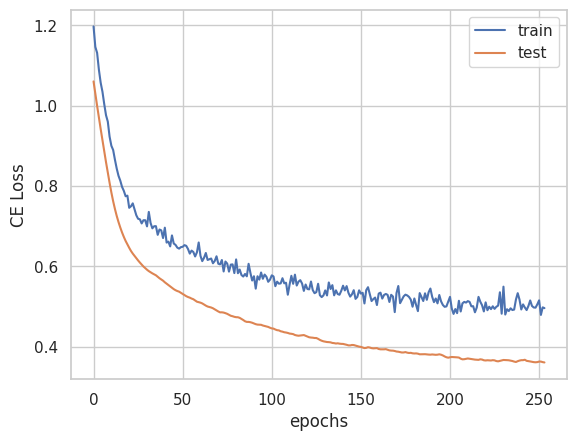

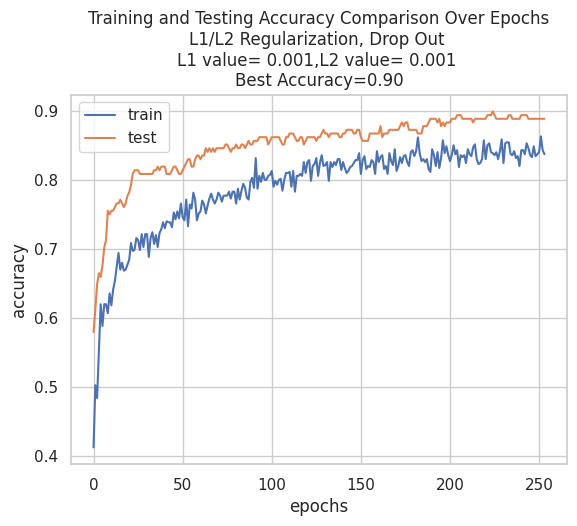

Confusion Matrix:
[[56  4  0]
 [ 2 61  4]
 [ 0  9 52]]


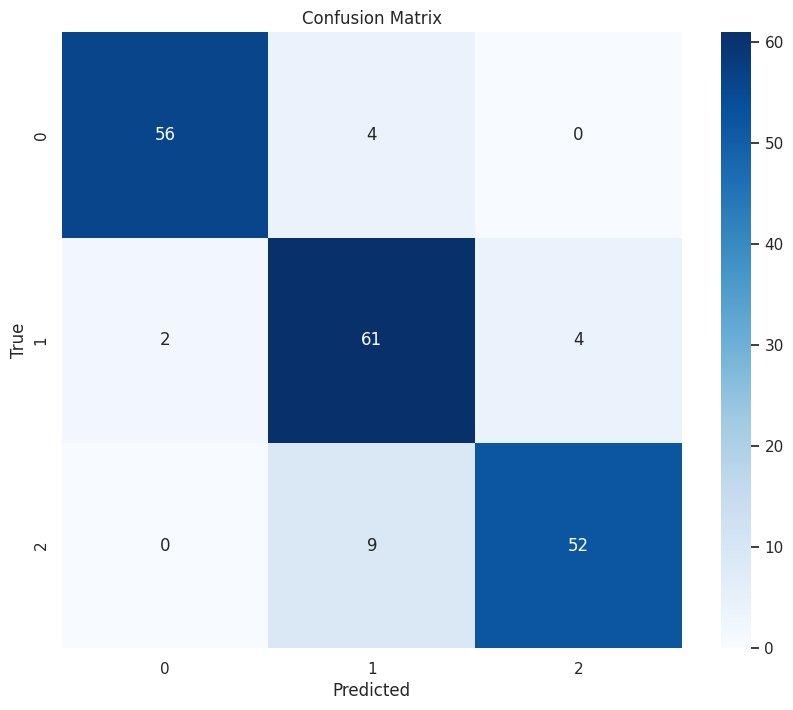

In [62]:
# training loop
for epoch in range(num_epochs):
    loss_in_epoch = []
    accuracy_in_epoch = []
    # set model in training mode and run through each batch
    model.train()
    with tqdm.trange(batches_per_epoch, unit="batch", mininterval=0) as bar:
        bar.set_description(f"No. {epoch} Epoch")
        for i in bar:
            # take a batch
            start = i * batch_size
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # model carries out forward pass
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch) # we determine the cross entropy loss

            # L1 regularization
            l1_reg = torch.tensor(0.0)
            for param in model.parameters():
                l1_reg += torch.norm(param, 1)

            loss = loss + (l1_lambda * l1_reg)

            # model now does backward pass
            optimizer.zero_grad()
            loss.backward()
            # updating weights of the model
            optimizer.step()

            # computing and storing metrics from this batch
            accuracy = (torch.argmax(y_pred, 1) == torch.argmax(y_batch, 1)).float().mean()

            #all batch losses in the epoch are stored
            loss_in_epoch.append(float(loss))

            #all batch accuracies in the epoch are stored
            accuracy_in_epoch.append(float(accuracy))

            bar.set_postfix(
                loss=float(loss),
                accuracy=float(accuracy)
            )

    #Evaluating the model on the test set
    model.eval()

    with torch.no_grad(): #gradient tracking is turned off
        y_pred = model(X_test.float()) # generating the results when the model is applied on the test set
        # we compare the model test results (y_pred) with the actual values (y_test)
        accuracy=(torch.argmax(y_pred, 1) == torch.argmax(y_test, 1)).float().mean() #accuracy = correct / total
        accuracy=float(accuracy)
        loss = criterion(y_pred, torch.max(y_test, 1)[1])
        # calculating the cross entropy loss
        #criterion is the loss function criterion = nn.CrossEntropyLoss()

        history_of_training_loss.append(np.mean(loss_in_epoch))
        history_accuracy_of_training.append(np.mean(accuracy_in_epoch))
        history_of_test_loss.append(loss)
        history_accuracy_of_test.append(accuracy)

        if accuracy>accuracy_highest:
            # will store highest accuracy recorded in any of the epochs
            accuracy_highest=accuracy
            #now we will store the weights of the best model to the weights_best variable
            weights_best=copy.deepcopy(model.state_dict())
        print(f"Epoch No. {epoch} validation: Cross Entropy loss={loss:.2f}, Accuracy={accuracy*100:.1f}%")

          # Check if epoch is greater than 10 and accuracy is decreasing
        if epoch > 60:
            n=40
            last_accuracies = history_accuracy_of_test[-n:]
            if accuracy <= min(last_accuracies):
                print(f"Early stopping at epoch {epoch} due to decreasing accuracy.")
                break

# Restoring best model using the best weights identified during evaluation
model.load_state_dict(weights_best)

# Plot the loss and accuracy
plt.plot(history_of_training_loss, label="train")
plt.plot(history_of_test_loss, label="test")
plt.xlabel("epochs")
plt.ylabel("CE Loss")
plt.legend()
plt.show()

plt.plot(history_accuracy_of_training, label="train")
plt.plot(history_accuracy_of_test, label="test")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title(f"Training and Testing Accuracy Comparison Over Epochs\nL1/L2 Regularization, Drop Out \nL1 value= {l1_lambda},L2 value= {l2_lambda} \nBest Accuracy={accuracy_highest:.2f}")
plt.legend()
plt.show()


model.eval()
with torch.no_grad():
    test_outputs = model(X_test.float())
    predicted = torch.argmax(test_outputs, dim=1)
    y_true = torch.max(y_test, 1)[1]
    # Computing and printing the confusion matrix
    cm = confusion_matrix(y_true, predicted)
    print("Confusion Matrix:")
    print(cm)

    # Visualizing the confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(output_size), yticklabels=range(output_size))
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()
